# Analyse Projekt: 
# Vorhersage der Preisentwicklung von Krypto-Währungen
---
Modul: Data-Mining und Visual Analytics\
**Gruppe A: Michele Candolfo, Philipp Eiler, Kathrin Engelmann, Patrick Kurz**\
Submission: 28.02.2022 | WS2021/2022 | Prof. Dr. Carsten Lanquillon

---

# 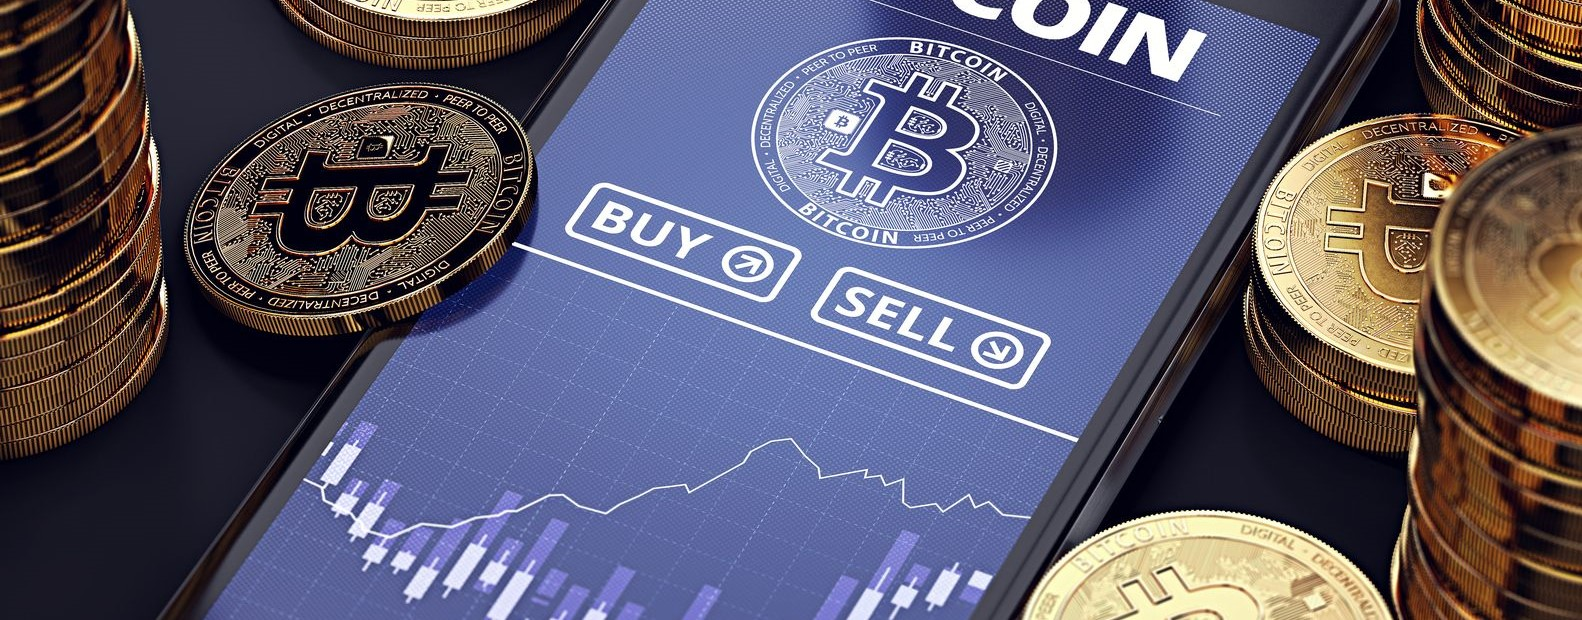
[1]

Im Rahmen der Vorlesung Data Mining und Visual Analytics soll eine Projektarbeit über eine Problemstellung verfasst werden die mithilfe von Machine Learning Methoden gelöst werden kann, um die Vorlesungsinhalte weiter zu vertiefen. Hierbei wird neben der reinen Programmierung auch die verwendeten Algorithmen verglichen und bewertet. Abschließend wird ein Ausblick zur weiteren Behandlung des Themas gegeben. 

Die Zielsetzung der vorliegenden Arbeit ist die kurzfristige Vorhersage des Bitcoin-Preises mithilfe der Algorithmen XGBoost und Long Short-Term Memory (LSTM). Darüber hinaus soll die Grundlage geschaffen werden weitere Kryptowährungen einfach an das Modell anbinden zu können. Zu dieser Zielsetzung wurden bereits mehrere Paper veröffentlicht [2, 3, 4] welche als Aufsatzpunkt dienten und im Rahmen des Analyseprojekts optimiert werden sollten. Die Arbeit wurde anhand des CRISP-DM Modells aufgebaut und strukturiert. 

ERGEBNIS 

KRITISCHE BETRACHTUNG 

Die vorliegende Ausarbeitung kann mithilfe verschiedener Ansatzpunkte weiter verbessert werden.  Zum einen könnte die Qualität der Vorhersagen durch die Betrachtung weiterer Parameter verbessert werden. Denkbar wäre die Erweiterung des erarbeiteten Modells um eine Sentiment Analysis. Hierzu könnten zum Beispiel Social Media Daten (z.B. Tweets) analysiert und deren Einfluss auf Kursänderungen mitbewertet werden. Ein Modell, welches nur auf diesen Auswertungen Kursprognosen trifft, wurde auch bereits in einem Paper veröffentlicht [4]. Darüber hinaus wäre eine Anbindung mehrerer Kryptowährungen oder auch Aktien über die angebundene API ein Ansatzpunkt für Verbesserungen. So könnte ein ganzes Portfolio an Währungen oder Aktien verwaltet werden. Mithilfe eines Bots könnten automatisierte Transaktionen auf Grundlage der vorhergesagten Preise durchgeführt werden und dem Nutzer so den manuellen Aufwand Transaktionen zu tätigen komplett abnehmen.

# 1 - Business Understanding 

<p> In der ersten Phase des CRISP-DM Modells steht die betriebswirtschaftliche Bewertung der Problemstellung im Vordergrund. Hierbei ist es wichtig die konkreten Anforderungen an die Datenanalyse zu stellen. Das Business Understanding bildet die zentrale Grundlage für alle weiteren Schritte und Entscheidungen. Bevor die Fragestellung definiert wird, folgt zunächst eine kurze Einführung zu Kryptowährungen.

Eine Kryptowährung ist eine digitale Währung, die als Zahlungsmittel konzipiert ist und starke Kryptographie verwendet, um Finanztransaktionen zu sichern, die Schaffung zusätzlicher Einheiten zu kontrollieren und die Übertragung von Vermögenswerten zu überprüfen. Sie basieren auf dezentralen Systemen, die auf der Blockchain-Technologie aufbauen, einem sogenannten dezentralen Ledger, der von einem verteilten Computernetzwerk betrieben wird [5]. Die erste dezentrale Kryptowährung, Bitcoin, wurde im Jahr 2009 als Open-Source-Software veröffentlicht. Seitdem wurden etwa 5000 weitere Kryptowährungen (Altcoins) veröffentlicht. Im Februar 2022 beläuft sich die gesamte Marktkapitalisierung von Kryptowährungen auf rund 1,74 Milliarden US-Dollar, wobei allein Bitcoin eine Marktkapitalisierung von 735 Milliarden US-Dollar aufweist [6]. In Anbetracht dieses Marktwerts, haben Kryptowährungen große Aufmerksamkeit erregt, wobei sie von einigen als eigentliche Währungen und anderen als Investitionsmöglichkeiten betrachtet werden. Diese Aufmerksamkeit hat zu großen Schwankungen des Preises geführt. Zum Beispiel stieg der Wert von Bitcoin im Jahr 2017 von 863 US-Dollar am 9. Januar 2017 um etwa 2000 Prozent auf einen Höchststand von 17.900 US-Dollar am 15. Dezember 2017. Acht Wochen später jedoch, am 5. Februar 2018, hatte sich der Preis mehr als halbiert auf einen Wert von nur noch 6200 US-Dollar [6].  Diese hohe Volatilität des Wertes von Kryptowährungen bedeutet Unsicherheit sowohl für Investoren als auch für Menschen, die beabsichtigen, sie als tatsächliche Währung zu verwenden. Kryptowährungen verhalten sich nicht wie traditionelle Währungen und daher ist es schwierig zu bestimmen, was zu dieser Volatilität führt. Diese macht es wiederum schwierig, die zukünftigen Preise einer Kryptowährung Preise von Kryptowährungen korrekt vorherzusagen. 

Das Ziel dieses Analyseprojektes ist die möglichst genaue Vorhersage der Bitcoin-Preisentwicklung anhand verschiedener Machine Learning-Methoden. Auf Grundlage der Ergebnisse kann der Anwender entsprechende Investitionen tätigen. Der betriebswirtschaftliche Nutzen liegt entsprechend im direkten monetären Vorteil beim Anwender. Um diesen Vorteil zu maximieren, muss das Modell möglichst genaue Vorhersagen treffen. Als Erfolgskriterium für die Modelle werden verschieden Kennzahlen herangezogen. Die Zielgrößen der Kennzahlen sind dabei folgende:<br> </p>
<br>

| Kriterium | Zielwert 
| -------------- | :--------------: |
| MAPE | < 5%
| Variance Regression Score | > 90% 

# 2 - Data Understanding

__Hindergrundinformationen:__

Die in diesem Jupyter Notebook genutze Datensatz stammen aus Webseite/Quelle "Yahoo Finance". Auf folgender Webseite sind die Daten ersichtlich (https://de.finance.yahoo.com)[7]. Die Daten werden nicht herkömmlich durch eine CSV in das Jupyter Notebook hochgeladen, sondern durch die yfinance API. Diese wird durch das Modul yfinance bereitgestellt [8]. Die yfinance API bietet die Möglichkeit auf jede Art von Kyprowährung, sowie Aktien zuzugreifen. Dies ermöglicht eine hohe flexibilität des Jupyter Notebooks, es kann durch einfaches Austauschen der Bezeichnung der Kryptowährung oder ähnliches auf den spezifichen Datensatz zugegriffen werden. 

__Erwartungshaltung:__

Die Erwartungshaltung an die Daten ist sehr hoch, da dieser aus einer verlässlichen Quelle wie yahoo finance stammen. Er werden keine fehlenden Werte oder ausreißer jeglicher Art erwartet. Dies wird dennoch im Laufe dieses Jupyter Notebook überprüft um die Erwartungshaltung ggf. zu korrigieren. 

Dieses Jupyter Notebook orientiert sich an Kaggle Notebooks, welche das Thema Bitcoin price prediction mit verschiedenen Machine Learning Algorithmen behandeln [9][10].

In [ ]:
# Installing the yfinance module to access the data via API
! pip install yfinance

In [ ]:
# Imports
import math
import os
import pandas as pd
import numpy as np
import yfinance as yf
from numpy import array

# Import modules for visualization
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from pandas.plotting import scatter_matrix
import seaborn as sns

# Import modules for Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Import module for scaling
from sklearn.preprocessing import MinMaxScaler

#Import XGBRegressor
from xgboost import XGBRegressor

# Import modules for specific regression scores
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.metrics import mean_absolute_percentage_error


# Import modules for LSTM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN

# Import modules for hyperparametertuning
from sklearn.model_selection import GridSearchCV





Es gibt die Möglichkeit einen anderen Datensatz, wie z.B. Ethereum hochzuladen. Dafür es es nur notwendig "BTC-USD" mit "ETH-USD" auszuwechseln. Für weitere Kryptowährungen sollten die Abkürzungen auf Yahoo Finance betrachtet werden.[7]

In [ ]:
# Loading latest data from Yahoo Finance API
btcHist = yf.Ticker("BTC-USD")

df = btcHist.history(period="MAX")


In [ ]:
# Displaying the first 5 records/entries
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,0,0
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,0,0
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,0,0
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,0,0
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,0,0


Wie nach der Funktion head erkennbar, besteht der Dateznsatz aus 8 Spalten. Die Spalten Dividends und Stock Splits werden ausgelassen, da diese nur Nullwerte enthalten. 

Erklärung der Einzelnen Spalten: 

| Spalte | Erklärung 
| -------------- | -------------- |
| Date | Die Daten werden im täglichen Rhytmus dargestellt
| Open | Eröffnungspreis von bsw. Bitcoin an einem bestimmten Tag 
| High | Höchter Preis von bsw. Bitcoin an einem bestimmten Tag  
| Low | Niedrigster Preis von bsw. Bitcoin an einem bestimmten Tag 
| Close | Endpreis von bsw. Bitcoin an einem bestimmten Tag 
| Volume | Handelsvolumen von bsw. Bitcoin an einem bestimmten Tag [11]

In [ ]:
# Delete dividends and stock splits columns
df = df.drop(['Dividends','Stock Splits'],axis = 1)

# Reseting the index
df = df.reset_index()

In [ ]:
# Displaying some information about the data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2721 non-null   datetime64[ns]
 1   Open    2721 non-null   float64       
 2   High    2721 non-null   float64       
 3   Low     2721 non-null   float64       
 4   Close   2721 non-null   float64       
 5   Volume  2721 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 127.7 KB


Die Infofunktion liefert wertvolle Informationen über die genutzen Daten. Da es sich hierbei um eine Datenzufuhr über API handelt, nehmen die Datenpunkte täglich zu. In diesem Fall ist schon erkennbar, dass jede Spalte die gleichen Anzahl an Datenpunkte hat, somit sind fehlende Werte vorerst auszuschließen. Zusätlich erhalten wir eine Übersicht der Datentypen, welche zwischen "datetime64", "float64" und "int64" variiert. 

In [ ]:
# Displaying some statistical value of the data set 
df.describe()

,Open,High,Low,Close,Volume
count,2721.000000,2721.000000,2721.000000,2721.000000,2.721000e+03
mean,11390.906697,11696.111340,11052.642332,11402.920602,1.473370e+10
std,16149.940449,16581.705921,15650.269463,16152.386547,2.000072e+10
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06
25%,607.005005,609.734985,604.606995,606.973022,8.026580e+07
50%,6330.770020,6446.259766,6236.470215,6329.950195,5.127130e+09
75%,10535.492188,10798.729492,10234.576172,10549.329102,2.460973e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


Wie anhand der statistischen Werte erkennbar ist, war der höchste "Close Price" des Bitcoins bei 67566.828 Dollar und der niedrigste bei 178,102 Dollar. Diese Werte beziehen sich auf den Zeitraum von mitte 2014 bis heute. 

In [ ]:
# Displaying the Shape of the data frame 
df.shape

(2721, 6)

Durch das Entfernen von "Dividends" und "Stock Splits" hat der Datensatz jetzt 6 Spalten.

In [ ]:
# Displaying the end of the data set to get the end date
df.tail()

,Date,Open,High,Low,Close,Volume
2716,2022-02-23,38285.281250,39122.394531,37201.816406,37296.570312,21849073843
2717,2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,46383802093
2718,2022-02-25,38333.746094,39630.324219,38111.343750,39214.218750,26545599159
2719,2022-02-26,39213.082031,40005.347656,38702.535156,39105.148438,17467554129
2720,2022-02-27,39078.054688,39769.511719,37829.585938,37829.585938,19942158336


Durch die implementierung der yfinance API erhalten wir deie Werte für den heutigen Tag.

In [ ]:
# Checking for some null values
print('Null Values:',df.isnull().values.sum())

Null Values: 0


In [ ]:
# Checking for some null values and getting a boolean value back 
print('NA values:',df.isnull().values.any())

NA values: False


Wie in der Erwartungshaltung beschrieben, gibt es keine fehlenden bzw. Nullwerte. Somit ist eine gewisse Datenqualität gewährleistet.

## Erkenntnisse aus der Data Understanding Phase:
- Der Datensatz enthält 8 Spalten, davon sind 6 für das weitere Vorgehen von Wert
- Der Datensatz enthält keine Nullwerte, somit ist eine gewissen Datenqualität gewährleistet
- Es handelt sich um eine Zeitreihe, welche im nächsten Schritt konkret beachtet werden muss
- Der Datensatz enthält keine kategorischen Daten, dadurch ist ein encoding dieser nicht notwendig


# 3 - Data Preparation

__Die Data Preparation Phase teilt sich in 3 weitere Abschnitte auf:__
- Im Abschnitt 3.1 wird eine explorative Datenanalyse durchgeführt, um einen besseren Überblick der Daten, Features und Target zu erhalten. Zusätzlich wird in dieser Phase jedes Jahr einzeln betrachte, um ggf. Besonderheiten zu identifizieren. Als letztes folgt eine Betrachtung des kompletten Zeitraum zwischen 2015 bis 2022.
- Im Abschnitt 3.2 wird die Featurebetrachtung und -auswahl durchgeführt, dabei wird jedes Feature durch eine Visualisierung betrachtet. Zusätzlich wird die Korrelation zwischen den Features untereinander, sowie zum dem Target "Close" analysiert. Der Informationsgehalt der Features und Traget wird ersichtlich. 
- Im Abschnitt 3.3 wird eine Data Splitting durchgeführt, bei Zeitreihen wird eine spezielle Datenteilung vorgenommen. Spezielle für das XGBoost werden die Daten so vorbereitet, damit einem Supervised Problem entsteht. 

Die in dieser Phase verwendete Vorgehensweise basiert auf das Kapitel 3 Datenimport und -vorbereitung des Buches Machine Learning - kurz & gut.[12]

## 3.1 EDA - Exploratory data analysis
__In diesem Kapitel werden die Jahre 2015 bis 2022 analysiert, es werden folgende Punkte analysiert:__
- Monatliche Betrachtung des Close Preises
- Visualisierung der Entwicklung des Close Preises anhand der verschiedenen Monaten 
- Vergleich der verschiedenen Jahre anhand bestimmter Plots 
- Gesamtbetrachtung der Preisentwicklung von 2015 bis heute 
- Gesamtbetrachtung des Volumens von 2015 bis heute

### Analysis of the year 2015

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [ ]:
y_2015 = df.loc[(df['Date'] >= '2015-01-01') & (df['Date'] <= '2015-12-31')]

In [ ]:
monthvise_2015= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2015 = monthvise_2015.reindex(new_order, axis=0)
monthvise_2015

,Open,Close
Date,,
January,251.799905,248.782547
February,232.821856,234.153645
March,269.278419,269.042259
April,235.708668,235.491534
May,237.161806,236.997001
June,236.941433,238.081766
July,278.857679,279.563740
August,252.986774,250.733805
September,233.486733,233.595533


#### Create a box diagram of the price development in the year 2015

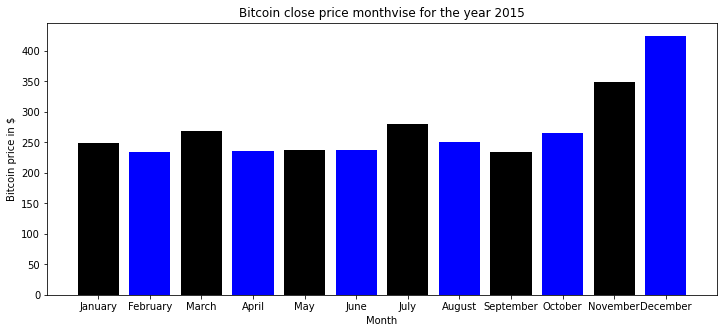

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2015['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2015')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

#### Create a linear diagram of the price development in the year 2015

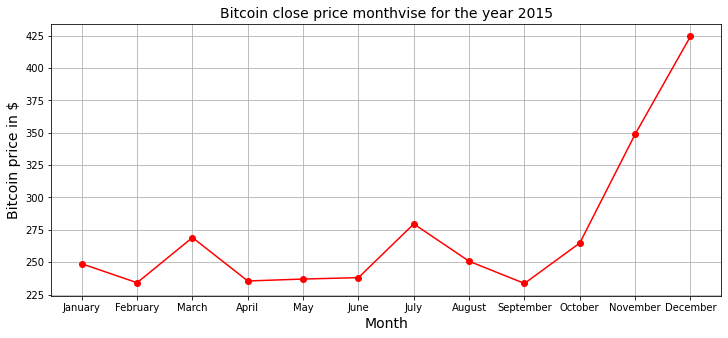

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2015['Close'], color='red', marker='o')
plt.title('Bitcoin close price monthvise for the year 2015', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()



#### Endbetrachtung:
- Das Jahr 2015 ist Richtung Ende recht positiv verlaufen. 

### Analysis of the year 2016

In [ ]:
y_2016 = df.loc[(df['Date'] >= '2016-01-01') & (df['Date'] <= '2016-12-31')]


In [ ]:
monthvise_2016= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2016 = monthvise_2016.reindex(new_order, axis=0)
monthvise_2016

,Open,Close
Date,,
January,412.805902,410.844485
February,402.304692,404.408274
March,417.262033,416.525774
April,433.487433,434.339398
May,459.237547,461.954415
June,638.544834,642.869061
July,662.977779,661.356103
August,581.238966,579.585197
September,604.614034,605.848633


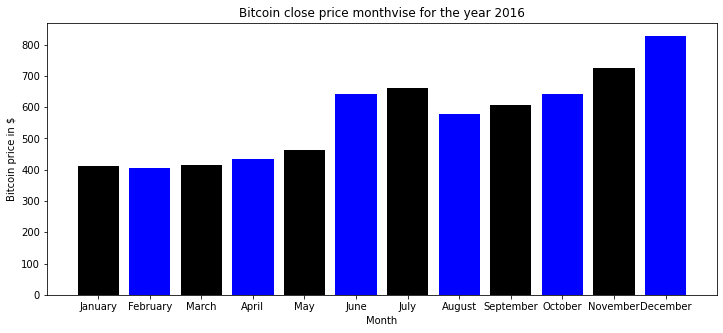

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2016['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2016')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

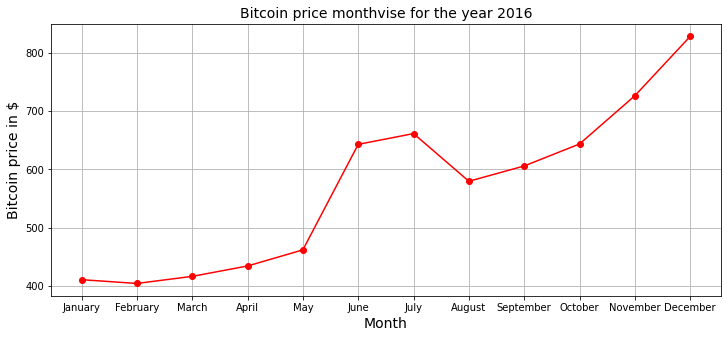

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2016['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2016', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2016 ist Richtung Ende recht positiv verlaufen. 

### Analysis of the year 2017

In [ ]:
y_2017 = df.loc[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2017-12-31')]

In [ ]:
monthvise_2017= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2017 = monthvise_2017.reindex(new_order, axis=0)
monthvise_2017

,Open,Close
Date,,
January,914.680971,914.916159
February,1055.620071,1062.533672
March,1133.212576,1129.365228
April,1197.646997,1206.641007
May,1865.748712,1895.383529
June,2630.573332,2636.204346
July,2509.213233,2519.418386
August,3819.812579,3880.989998
September,4077.400993,4064.836312


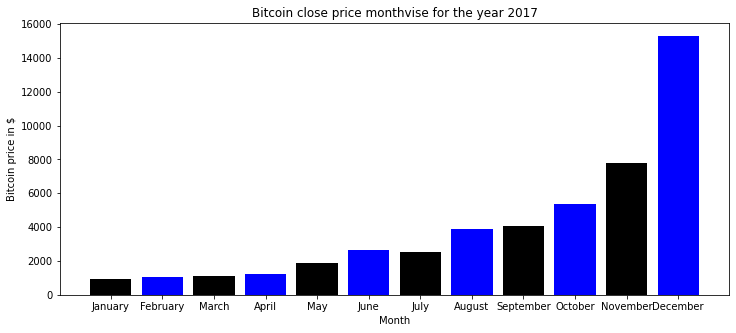

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2017['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2017')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

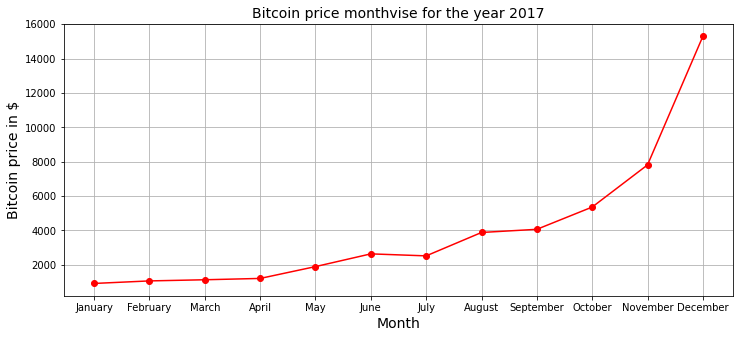

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2017['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2017', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2017 ist Richtung Ende recht positiv verlaufen. 

### Analysis of the year 2018

In [ ]:
y_2018 = df.loc[(df['Date'] >= '2018-01-01') & (df['Date'] <= '2018-12-31')]


In [ ]:
monthvise_2018= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2018 = monthvise_2018.reindex(new_order, axis=0)
monthvise_2018

,Open,Close
Date,,
January,13212.074219,13085.558090
February,9462.242920,9472.001151
March,9156.591718,9040.557097
April,7963.618311,8033.596631
May,8505.240675,8450.997732
June,6829.257975,6793.507666
July,7101.466450,7146.349987
August,6723.800955,6700.129946
September,6622.821338,6610.675033


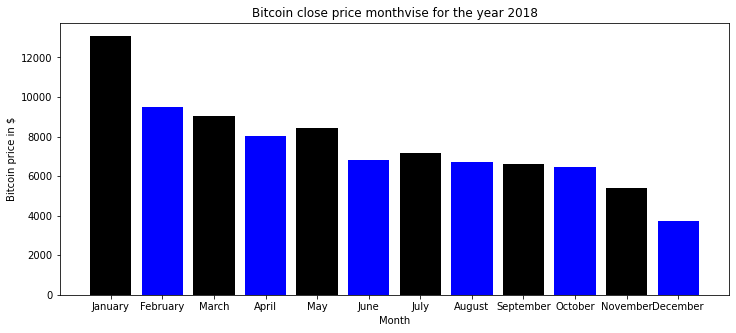

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2018['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2018')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

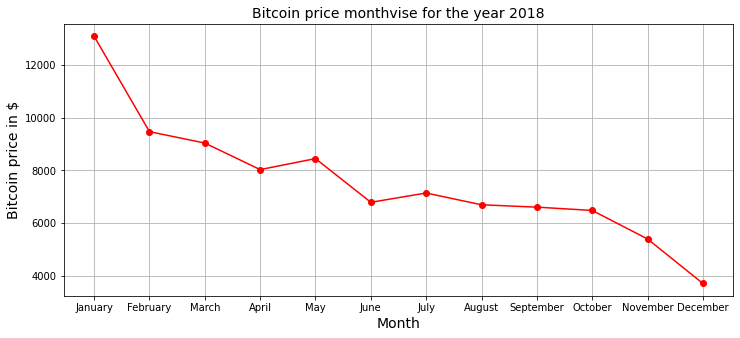

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2018['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2018', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2018 ist Richtung Ende recht negativ verlaufen. 

### Analysis for the year 2019

In [ ]:
y_2019 = df.loc[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-12-31')]

In [ ]:
monthvise_2019 = y_2019.groupby(y_2019['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2019 = monthvise_2019.reindex(new_order, axis=0)
monthvise_2019

,Open,Close
Date,,
January,3709.705645,3701.554963
February,3697.178327,3711.907261
March,3967.740400,3976.069100
April,5136.813314,5178.469434
May,7205.208024,7309.694131
June,9339.480322,9415.900179
July,10691.706055,10669.336158
August,10657.745621,10643.248362
September,9858.141813,9814.067871


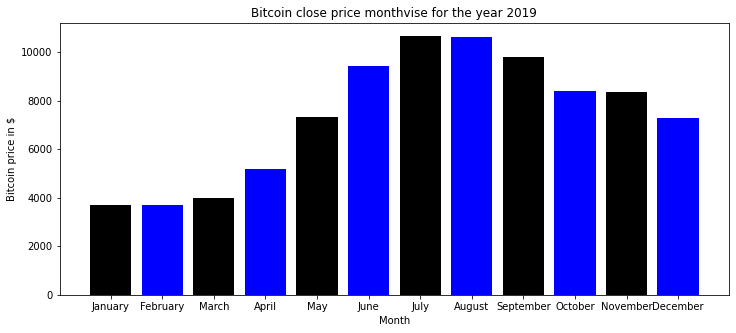

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2019['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2019')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

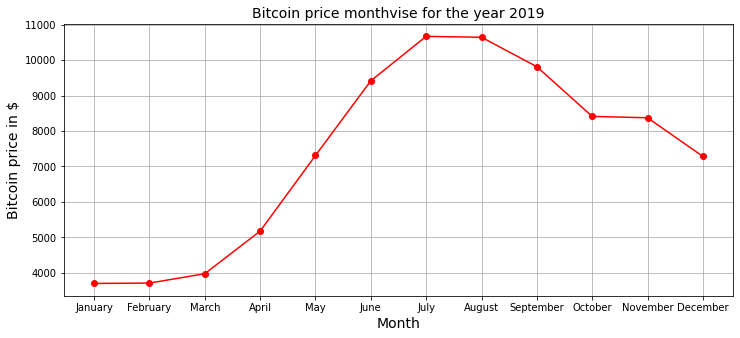

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2019['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2019', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2019 war bis zum Monat Juli recht positiv, dennoch kam es ab dem Monat August zu einem Abstieg des Bitcoin Preises. 

### Analysis of the year 2020

In [ ]:
y_2020 = df.loc[(df['Date'] >= '2020-01-01') & (df['Date'] <= '2020-12-31')]

In [ ]:
monthvise_2020 = y_2020.groupby(y_2020['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2020 = monthvise_2020.reindex(new_order, axis=0)
monthvise_2020

,Open,Close
Date,,
January,8318.949597,8389.270476
February,9656.215113,9630.722185
March,6943.507009,6871.016113
April,7150.611328,7224.477327
May,9237.761530,9263.151745
June,9499.797005,9489.227214
July,9519.383852,9589.899729
August,11639.097215,11652.394185
September,10689.700163,10660.276855


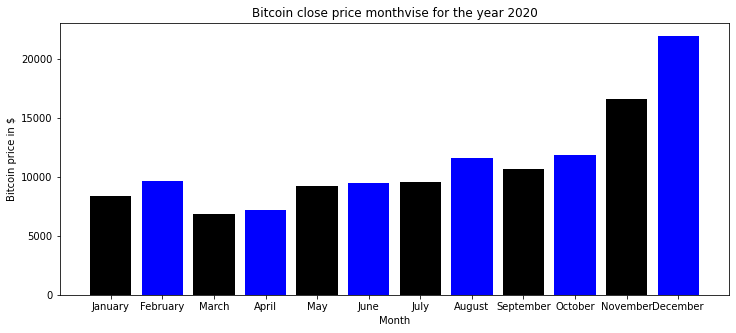

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2020['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2020')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

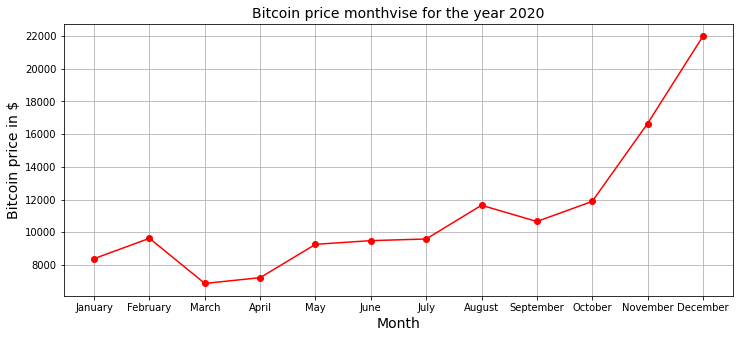

In [ ]:
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2020['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2020', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2020 ist Richtung Ende recht positiv verlaufen. 

### Analysis for the year 2021

In [ ]:
# Define the date for the year 2021
y_2021 = df.loc[(df['Date'] >= '2021-01-01') & (df['Date'] <= '2021-12-31')]

In [ ]:
# Distribution of the data into months
monthvise_2021 = y_2021.groupby(y_2021['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2021 = monthvise_2021.reindex(new_order, axis=0)
monthvise_2021

,Open,Close
Date,,
January,34652.961694,34761.649950
February,45874.967215,46306.798968
March,54544.678175,54998.008695
April,57251.256250,57206.720052
May,47105.828503,46443.286668
June,35920.546940,35845.154687
July,34234.212450,34444.973790
August,45516.119834,45709.022681
September,46041.859375,45939.771484


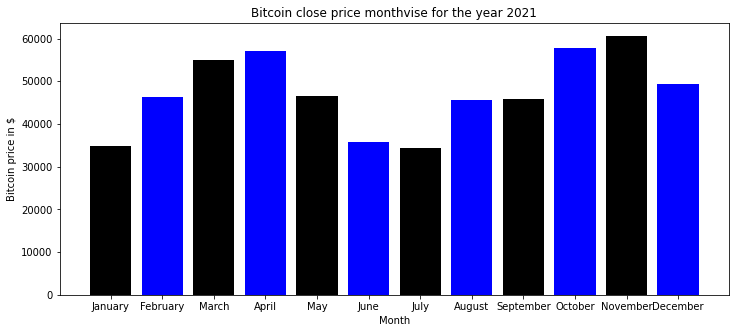

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2021['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2021')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

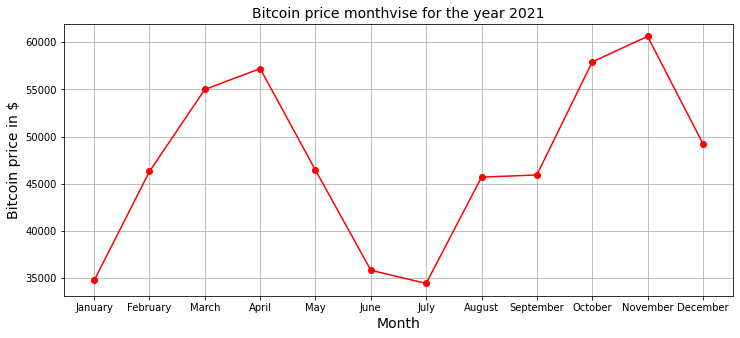

In [ ]:
# Plotting the bitcoin price mothvise for the year 2021
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2021['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2021', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2021 war einer der volatilsten und heißesten Jahre des Bitcoins, es wurde ein Rekordpreis für den Bitcoin im November erreicht. 

### Analysis of the year 2022

In [ ]:
# Define the date for the year 2022
y_2022 = df.loc[(df['Date'] >= '2022-01-01')]

In [ ]:
# Distribution of the data into months
monthvise_2022 = y_2022.groupby(y_2022['Date'].dt.strftime('%B'))[['Open','Close']].mean()

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

monthvise_2022 = monthvise_2022.reindex(new_order, axis=0)
monthvise_2022

,Open,Close
Date,,
January,41368.073463,41114.422379
February,40697.195023,40677.919994
March,NaN,NaN
April,NaN,NaN
May,NaN,NaN
June,NaN,NaN
July,NaN,NaN
August,NaN,NaN
September,NaN,NaN


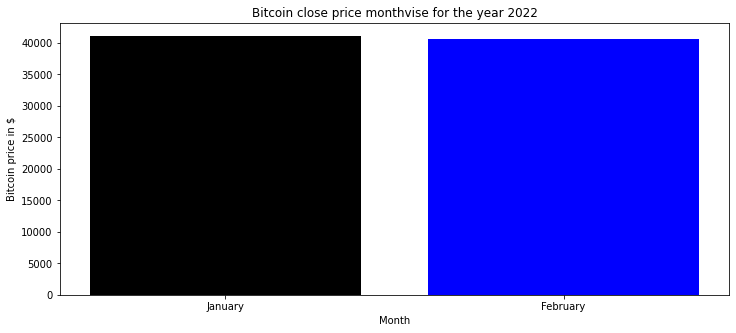

In [ ]:
# Create bars and choose color
plt.figure(figsize=(12, 5))
plt.bar(new_order, monthvise_2022['Close'], color=['black', 'blue'])
 
# Add title and axis names
plt.title('Bitcoin close price monthvise for the year 2022')
plt.xlabel('Month')
plt.ylabel('Bitcoin price in $')
  
# Show graph
plt.show()

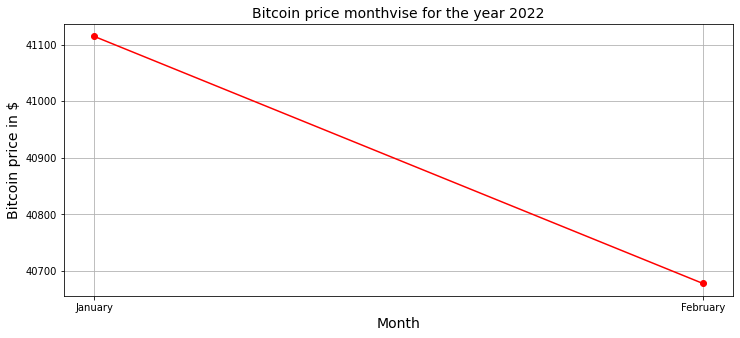

In [ ]:
# Plotting the bitcoin price mothvise for the year 2022
plt.figure(figsize=(12, 5))

plt.plot(new_order, monthvise_2022['Close'], color='red', marker='o')
plt.title('Bitcoin price monthvise for the year 2022', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

#### Endbetrachtung:
- Das Jahr 2022 verläuft eher negativ. 

### Overall analysis 2015 - 2022

In [ ]:
# Setting the data set from 2015 to today
overall = df.loc[(df['Date'] >= '2015-01-01')]

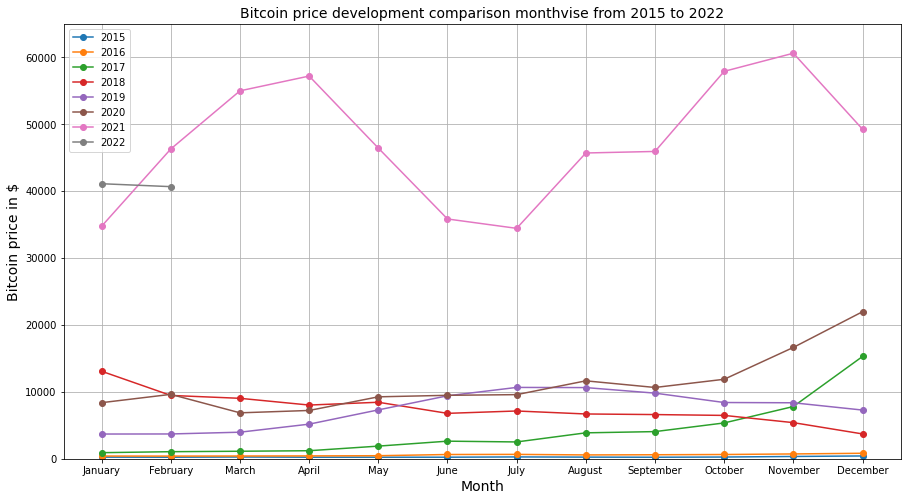

In [ ]:
# Plotting the bitcoin price development of the different years
plt.figure(figsize=(15, 8))

plt.plot(new_order, monthvise_2015['Close'], marker='o', label = "2015")
plt.plot(new_order, monthvise_2016['Close'], marker='o', label = "2016")
plt.plot(new_order, monthvise_2017['Close'], marker='o', label = "2017")
plt.plot(new_order, monthvise_2018['Close'], marker='o', label = "2018")
plt.plot(new_order, monthvise_2019['Close'], marker='o', label = "2019")
plt.plot(new_order, monthvise_2020['Close'], marker='o', label = "2020")
plt.plot(new_order, monthvise_2021['Close'], marker='o', label = "2021")
plt.plot(new_order, monthvise_2022['Close'], marker='o', label = "2022")

plt.ylim([0, 65000,])

plt.title('Bitcoin price development comparison monthvise from 2015 to 2022', fontsize=14)

plt.xlabel('Month', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
# show a legend on the plot
plt.legend()
plt.show()

In der Gesamtbetrachtung war das Jahr 2021 einer der heißesten Jahre! Im Gesamtkontext wirken die vorherigen Jahre als recht normal und monoton. 

Text(0.5, 1.0, '2022')

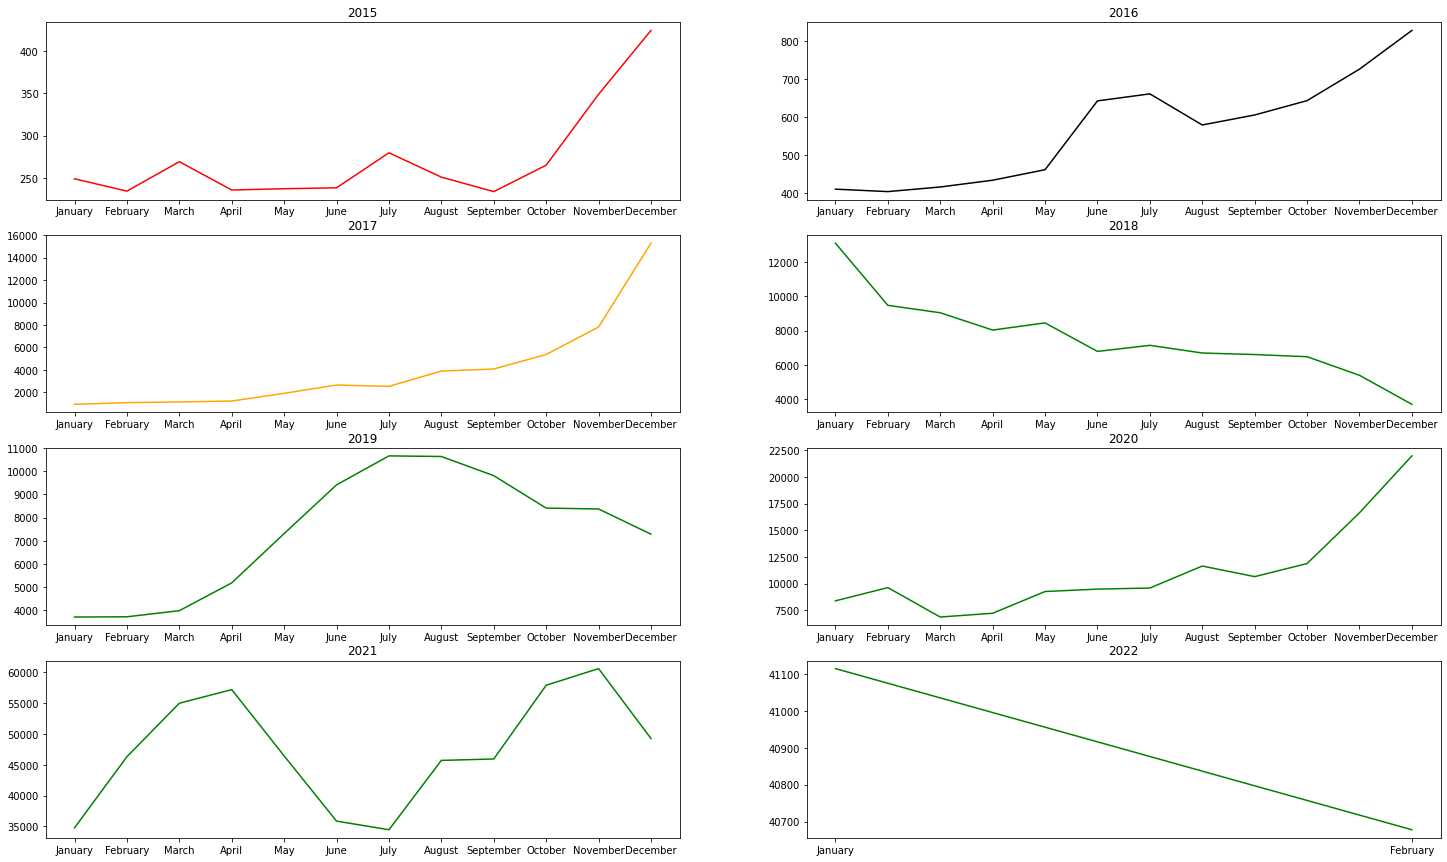

In [ ]:
# Plotting the bitcoin price development monthvise for the years 2015 to 2022

fig = plt.figure(figsize = (25,15))

plt.subplot(4, 2, 1)
plt.plot(new_order, monthvise_2015['Close'], color="red")
plt.title('2015')

plt.subplot(4, 2, 2)
plt.plot(new_order, monthvise_2016['Close'], color="black")
plt.title('2016')

plt.subplot(4, 2, 3)
plt.plot(new_order, monthvise_2017['Close'], color="orange")
plt.title('2017')

plt.subplot(4, 2, 4)
plt.plot(new_order, monthvise_2018['Close'], color="green")
plt.title('2018')

plt.subplot(4, 2, 5)
plt.plot(new_order, monthvise_2019['Close'], color="green")
plt.title('2019')

plt.subplot(4, 2, 6)
plt.plot(new_order, monthvise_2020['Close'], color="green")
plt.title('2020')

plt.subplot(4, 2, 7)
plt.plot(new_order, monthvise_2021['Close'], color="green")
plt.title('2021')

plt.subplot(4, 2, 8)
plt.plot(new_order, monthvise_2022['Close'], color="green")
plt.title('2022')




__Gesamtbetrachtung:__ 

__Preis am Anfang des Jahres niedriger als am Ende des Jahres: Positiv__ <br>
__Preis am Anfang des Jahres höher als am Ende des Jahres: Negativ__


| Jahr | Verlauf 
| -------------- | -------------- |
| 2015 | postiv
| 2016 | postiv 
| 2017 | postiv  
| 2018 | negativ
| 2019 | positiv
| 2020 | positiv
| 2021 | positiv
| 2022 | negativ

Bei dieser Betrachtung wird der durchschnittliche Anstieg des Bitcoinspreises betrachtet, dieser war nur für das Jahr 2018 und der ersten Monate des Jahres 2022 insgesamt negativ. 

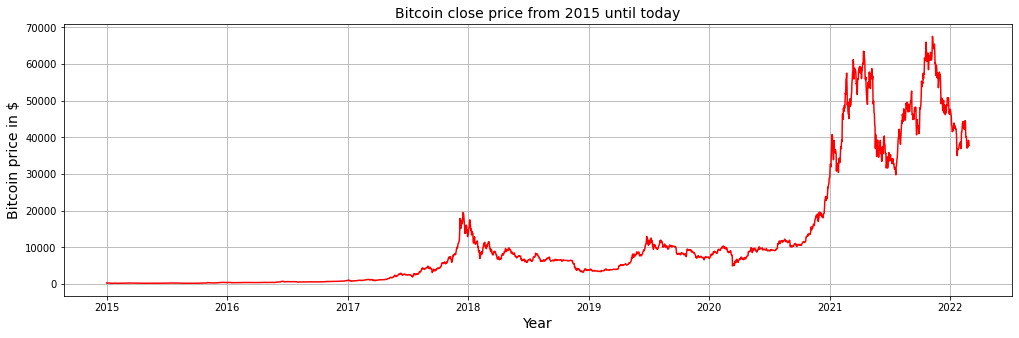

In [ ]:
# PLotting the bitcoin price until today
plt.figure(figsize=(17, 5))

plt.plot(overall['Date'], overall['Close'], color='red')
plt.title('Bitcoin close price from 2015 until today', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bitcoin price in $', fontsize=14)
plt.grid(True)
plt.show()

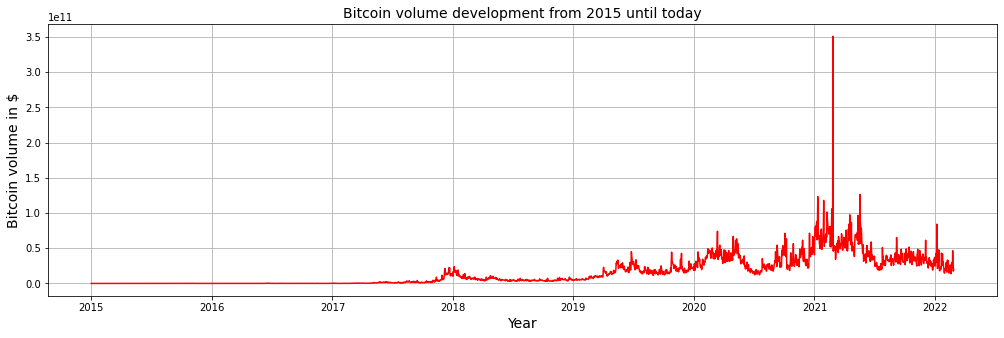

In [ ]:
plt.figure(figsize=(17, 5))


plt.plot(overall['Date'], overall['Volume'], color='red')
plt.title('Bitcoin volume development from 2015 until today', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Bitcoin volume in $', fontsize=14)
plt.grid(True)
plt.show()

Der Wert für das Volumen in den ersten Monaten des Jahres 2021 ist kein Ausreißer, dies wurde auf yfinance gecheckt und bestätigt.

In [ ]:
overall['Volume'].describe()

count    2.615000e+03
mean     1.532997e+10
std      2.017722e+10
min      7.860650e+06
25%      1.023965e+08
50%      5.639320e+09
75%      2.558510e+10
max      3.509679e+11
Name: Volume, dtype: float64

### Erkenntnisse aus dem Abschnitt 3.1:
- Relativ guten Überblick über die Preisentwicklung der verschiedenen Jahre 
- Der Bitcoinpreis ist in den letzen Jahren im Durchschnitt stetig gestiegen 
- Das Jahr 2021 war das volatilste Jahr 

## 3.2 Featurebetrachtung und -auswahl

### Anzeigen von Histogramm für jedes nummerische Attribut

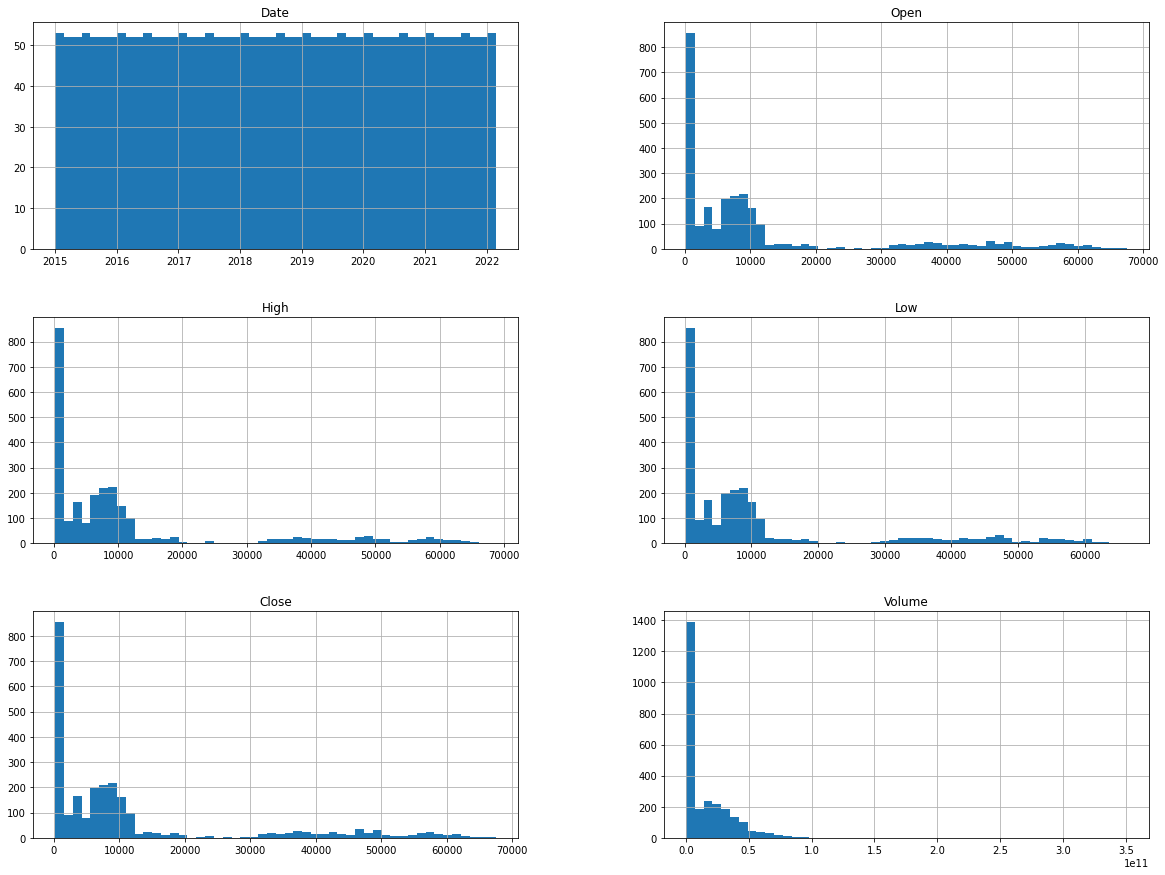

In [ ]:
# Plotting histograms for every numeric value 
overall.hist(bins=50, figsize=(20, 15))
plt.show()

#### Erkenntnis: 

__Eine Linksverteilung der nummerischen Werte ist hier erkennbar, dies liegt daran, dass der Bitcoinpreis Jahrelang niederige Werte hatte. Dies sollte uns bei der weiteren Betrachtung nicht stören, da plausible nachvollziehbar.__

### Anzeigen der Korrelation zwischen den Merkmalen und dem Target -> "Close Price"

In [ ]:
# Checking the correaltion of the nummeric values with the target "close" 
corr_matrix = overall.corr()
corr_matrix['Close'].sort_values(ascending=False)

Close     1.000000
High      0.999480
Low       0.999383
Open      0.998819
Volume    0.720716
Name: Close, dtype: float64

#### Erkenntnis: 
__Alle nummerischen Werte korrelieren mit dem Target "Close Price". Die stärkste Korrelation hat das nummerische Attribut "High". Die schwächste Korrelation hat das nummerische Attribut Volume. Es gilt in den nächsten Schritten zu überprüfen, ob alle Attribute wichtig für den Algorithmus sind.__

### Plotten einer Scattermatrix um die Korrelation zwischen den Attributen visuell darzustellen

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bfa3d5110>,
      dtype=object)

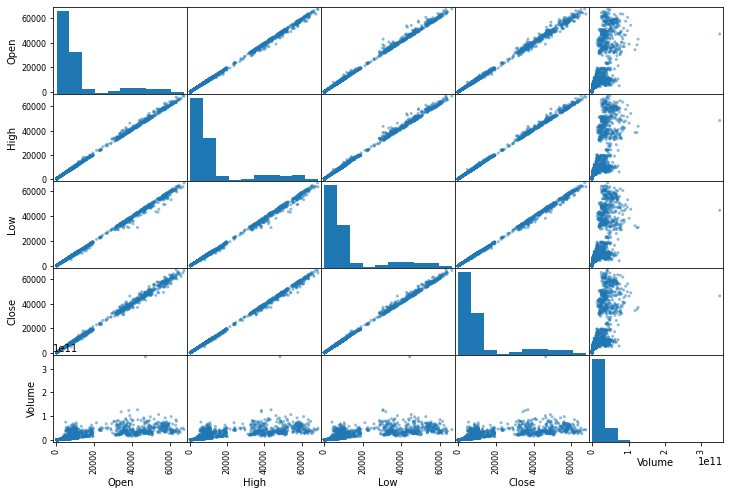

In [ ]:
# Plotting the scatter matrix to get a visuall impression of the correlation between the numeric values
scatter_matrix(overall, figsize=(12, 8))

#### Erkenntnis: 
__In der Scattermatrix ist ebenfalls erkennbar, dass die Attribute "Low", "High" und "Open" mit den Close Preis korrelieren, da ein Trend nach oben erkennbar ist. Das Attribut "Volume" stellt ebenfalls eine Korrelation da, dieses ist dennoch nicht stark.__ 

### Plotten einer Heat map für die Visualisierung der Korrelationen zwischen den nummerischen Attributen

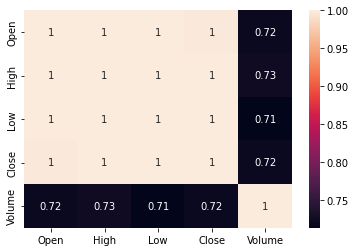

In [ ]:
# Plotting heatmap for correlation
corrmat = overall.corr()
sns.heatmap(corrmat, annot=True)

#### Erkenntnis:
__Auch dieses Ergebniss wiederspiegelt den vorherigen Betrachtungen.__

### Auswahl der Features anhand der Varianz 

In [ ]:
# Preparation of target and features
X = overall.drop(columns=['Close', 'Date'], axis= 1)
y = overall[["Close"]]

selector = SelectKBest(f_classif, k=4)
X_sel = selector.fit_transform(X, y)

print(selector.scores_)

# Printing colums of X 
print(X.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[  9135.95302179 177064.5461214   11124.95748146   2401.69527148]
Index(['Open', 'High', 'Low', 'Volume'], dtype='object')


### Erkenntnis aus dem Abschnitt 3.2:
__Wie erwartet hat das letzte Feature den geringsten Score, dies ist auch in der Korrelationsmatrix bekannt geworden. Das Fetaure "Volume" hat dennoch einen Informationsgehalt für das Target und wird in diesem Fall weiterbetrachtet.__

## 3.3 Data Splitting

### Datenvorbereitung für den XGBRegressor

In [ ]:
# Dropping all columns except date and close 
closedf = df[['Date', 'Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2721, 2)


In [ ]:
# Creating a data frame with data from the last year 
closedf = closedf[closedf['Date'] > '2021-02-27']

# Create a copy of the data frame 
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


#### Skalierung der Preise

In [ ]:
del closedf['Date']
# Scaling the price between 0 and 1 
scaler=MinMaxScaler(feature_range=(0,1))
# Reshaping the array in 1d array without changing its data 
closedf=scaler.fit_transform(np.array(closedf)).reshape(-1,1)
print(closedf.shape)

(365, 1)


#### Datenaufteilung in Trainings- und Testdaten

In [ ]:
# Splitting the data set in 70% train data and 30% in test data 
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]

print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (255, 1)
test_data:  (110, 1)


#### Visualisierung der Trainings- und Testdaten

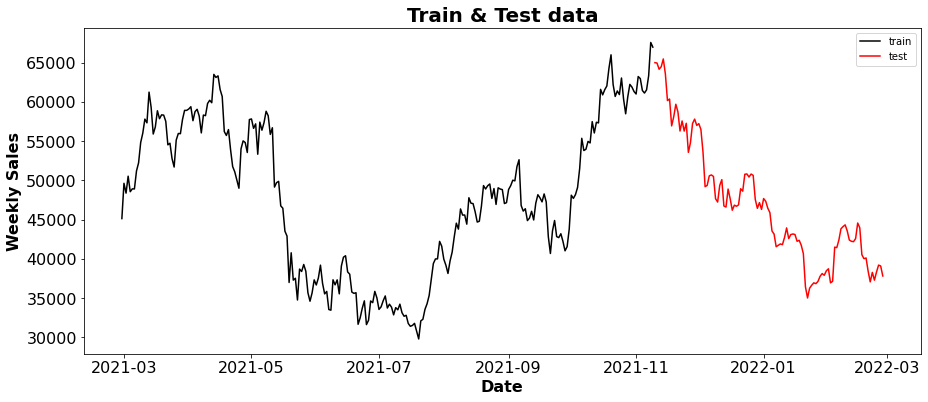

In [ ]:
# Plotting train and test data 
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x = close_stock['Date'][:255], y = close_stock['Close'][:255], color = 'black')
sns.lineplot(x = close_stock['Date'][255:], y = close_stock['Close'][255:], color = 'red')

# Formatting
ax.set_title('Train & Test data', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Date', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('Weekly Sales', fontsize = 16, fontdict=dict(weight='bold'))
plt.tick_params(axis='y', which='major', labelsize=16)
plt.tick_params(axis='x', which='major', labelsize=16)
plt.legend(loc='upper right' ,labels = ('train', 'test'))

#### Erkenntnis: 
__Die Daten wurden im Verhältnis von 70/30 aufgeteilt, dies entspricht in der Praxis dem Best practise.__

#### Vorbereiten der Trainings- und Testdaten für Zeitreihen
__Damit es bei einer Zeitreihe zu einem supervised learning Problem wird, muss der Datensatz restrukturiert werden. Dies wird dadurch gemacht, dass der Wert des vorherigen Datums/Zeitpunktes, um den Wert des nächsten Datums/Zeitpunktes vorherzusagen.__[7]


Als Beispiel:<br>

__Vor der Restrukturierung__ 

| time | measure 
| -------------- | -------------- |
| 1 | 100
| 2 | 110 
| 3 | 108  
| 4 | 115
| 5 | 120

__Nach der Restrukturierung__

| x | y 
| -------------- | -------------- |
| ? | 100
| 100 | 110 
| 110 | 108  
| 108 | 115
| 115 | 120
| 120 | ?

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (249, 5)
y_train:  (249,)
X_test:  (104, 5)
y_test (104,)


__In unserem Fall habt sich das Team entschieden mehrere Werte für den "Time Step": [1, 3, 5, 10, 20] zu testen. Dadruch kann beobachtet werden, inwiefern der "Time Step" auf die Qualität/Scores Auswirkung hat.__

## Erkenntnis aus der Phase Data Preparation
- Die Analyse der Jahre ergab, dass das Jahr 2021 am volatilsten war 
- Alle Feature des Datensatzes haben ausreichend Informationsgehalt für das Target und werden weiterhin betrachtet.
- Das Data Splitting ist bei Zeitreihen anders zu behandlen als bei normalen Daten, wie z.B. Klassifikationsdaten.
- Für eine Vorhersage mit dem XGRegressor, müssen die Zeitreihen bearbeitet werden, damit ein supervised learning Problem entsteht. 
- Die Auswahl eine geeigneten Auswahl eines Time Steps wird im weiteren eine relevante Rolle spielen, deshalb gilt es mehrere Time Steps und deren Auswirkung auf die Scores zu überprüfen.
- Für das LSTM, welches nur mit dem Close Preis trainiert wird, muss das Data Splitting kurz vor dem Modelling durchgeführt werden, weil es sonst zu Komplikationen mit dem XGRegressor kommen kann. 
- Für das LSTM, welches mit allen vorhanden Features trainiert wird, gilt es ebenfalls ein Data Splitting kurz vor dem Modelling zu durchführen, um Komplikationen mit den anderen Modellen im weiteren Verlauf zu vermeiden. 
- Das Data Splitting für das LSTM wird im weiteren Verlauf vor dem Modlling durchgeführt. 

# 4 - Modelling

### 4.1 XGBoost 

XGBoost ist ein open-source Machine Learning-Framework. Es führt gradient-boosted Modelle aus, die skalierbar sind und lernt schnelles, paralleles und verteiltes Rechnen, ohne die Speichereffizienz zu beeinträchtigen. 
Es ist unter anderem ein Tree-based Ensemble-Lernprogramm, wobei die Grundlage des XGBoost ein Ensemble aus Regressionsbäumen darstellt. [8]

Dementsprechend kann XGBoost sowohl Regressions- als auch Klassifikationsprobleme lösen. XGBoost verwendet Boosting, um aus den Fehlern zu lernen, die in den vorangegangenen Bäumen begangen wurden. [8] 
Die Methodik wurde erstmals 2016 in einem Paper von Chen und Guestrin veröffentlicht. [9]
Durch eine Vielzahl von Parametern ist die Methode sehr gut regulierbar. In Kapitel ‚Parameter‘ werden die für dieses Analyseprojekt herangezogenen Hyperparameter kurz erläutert.



#### Was ist Gradient Boosting?
Gradient Boosting bezieht sich auf eine Methode des Machine Learnings, bei der ein Ensemble empfindlicher Lerner verwendet wird, um die Leistung des Modells in Bezug auf Effizienz, Genauigkeit und Interpretierbarkeit zu verbessern. 
Diese Lernenden sind so definiert, dass sie eine bessere Leistung als der Zufall erbringen. Bei solchen Modellen handelt es sich in der Regel um Entscheidungsbäume, deren Ergebnisse für bessere Gesamtergebnisse kombiniert werden. [15]
Die Hypothese besteht darin, Werte herauszufiltern, die schwer genau vorherzusagen sind, und dabei neue empfindliche Lerner zu entwickeln.

Das ursprüngliche Modell wird trainiert und die Vorhersagen werden für den gesamten Datensatz durchgeführt. Der Fehler zwischen dem tatsächlichen Wert und der Vorhersage wird berechnet und die falschen Vorhersagen werden stärker gewichtet. Anschließend wird ein neues Modell erstellt, das versucht, den Fehler des vorherigen Modells zu beheben, und auf ähnliche Weise werden mehrere Modelle erstellt. Das endgültige Modell ergibt sich aus der Gewichtung des Mittelwerts aller Modelle. [15, 16]

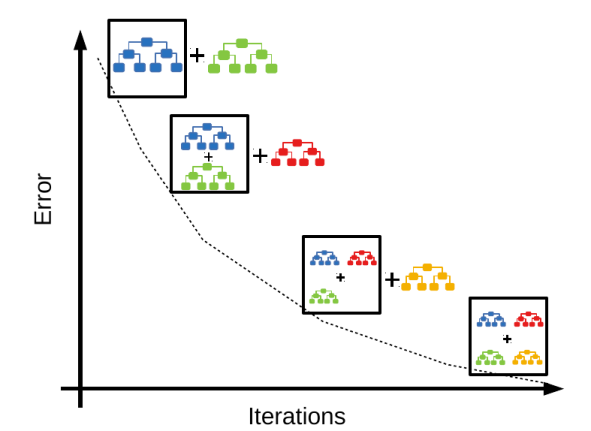

[15]

Die Verlustfunktion quantifiziert, wie weit unsere Vorhersage vom tatsächlichen Ergebnis für einen bestimmten Datenpunkt entfernt ist. Je besser die Vorhersagen sind, desto niedriger ist die Ausgabe der Verlustfunktion. 

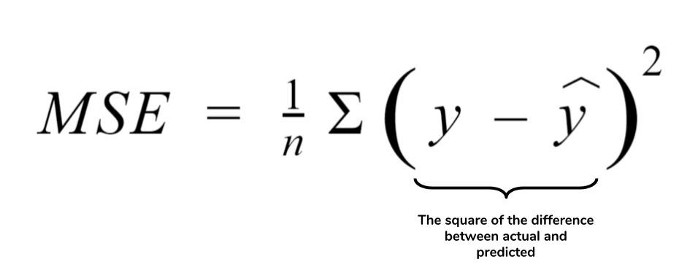

[16] 

#### Parameter
Beim Einsatz des XGBoost Algorithmus können verschiedene Hyperparameter angepasst werden, welche das Lernverhalten des Modells beeinflussen. Die Parameter werden dabei in drei Themenbereiche unterteilt: Allgemeine Parameter, Booster Parameter und Learning Parameter. <br>
Über die Auswahl der allgemeinen Parameter wird bestimmt, welche Art Booster gewählt werden soll. Baumbasierte Booster sind hierbei der Standard. Die Booster Parameter lassen die gewählte Booster Art näher konfigurieren. Die Learning Parameter bestimmten das direkte Lernverhalten des Modells und können an das jeweilige Szenario angepasst werden. [16] 
<br>
<br>
Die Tabelle beschreibt die im Folgenden verwendeten Parameter: <br>

| Parameter | Beschreibung | Werte 
| -------------- | -------------- | -------------- 
| Objective | Bestimmt die Funktion der Methode | reg:squarederror --> Lineare Regression <br> reg:logistic --> Logistic Regression <br> binary:logistic --> Logistic Regression mit Ausgabe der Wahrscheinlichkeiten 
| max_depth | Die maximale Tiefe pro Baum. Ein tieferer Baum kann die Leistung erhöhen, aber auch die Komplexität und die Gefahr von Overfitting. | Werte > 0; Default: 6
| learning_rate |  Die Lernrate bestimmt die Schrittgröße bei jeder Iteration, während das Modell auf sein Ziel hin optimiert wird. | Werte zwischen 0 und 1; Default: 0.3
| n_estimators | Die Anzahl der Bäume in einem Ensemble. Dies entspricht der Anzahl der Boosting-Runden. | Wert > 0 (INT); Default: 100 
| colsample_bytree |  Stellt den Anteil der Spalten dar, die für jeden Baum nach dem Zufallsprinzip abgetastet werden. | Werte zwischen 0 und 1; Default: 1
| reg_alpha | L1-Regularisierung der Gewichte (Lasso-Regression). Bei der Arbeit mit einer großen Anzahl von Merkmalen kann dies die Geschwindigkeit verbessern. | Bebliebiger Wert (INT); Default: 0

[16]

#### 4.1.1 XGBoost ohne Parametertuning

In [ ]:
# Initiate & fit the model

pp_xg = XGBRegressor(objective='reg:squarederror', n_estimators=100)
pp_xg.fit(X_train, y_train, verbose=False)

XGBRegressor(objective='reg:squarederror')

In [ ]:
print('Parameters currently in use:\n')
pp_xg.get_xgb_params()

Parameters currently in use:



{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'nthread': 1,
 'objective': 'reg:squarederror',
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
# Prediction

predictions = pp_xg.predict(X_test)

In [ ]:
# Shape of train & test data

train_predict=pp_xg.predict(X_train)
test_predict=pp_xg.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (249, 1)
Test data prediction: (104, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Vergleich zwischen Original Preis und hervorgesagtem Preis',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
# Evaluation metrices RMSE and MAE

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain, train_predict))
print("Train data MAPE: ", mean_absolute_percentage_error(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest, test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest, test_predict))
print("Test data MAPE: ", mean_absolute_percentage_error(original_ytest, test_predict))

Train data RMSE:  1036.6640890825124
Train data MSE:  1074672.433593275
Train data MAE:  785.6262785517068
Train data MAPE:  0.017351911344349644
-------------------------------------------------------------------------------------
Test data RMSE:  1841.1196206620384
Test data MSE:  3389721.4575867285
Test data MAE:  1407.712289663461
Test data MAPE:  0.030917941060048568


@Patrick Interpretation der Score und Ergebnisse, am besten mit Quelle bitte :)

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.9890388214134161
Test data explained variance regression score: 0.9285809964469001


Vorhersage für die nächsten 10 Tage mit xgRegressor

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = pp_xg.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = pp_xg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3 4 5]
[ 6  7  8  9 10 11 12 13 14 15]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 5 days close price','Predicted next 10 days close price'])


fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Vergleich der vergangenen 5 Tage gegenüber den hervorgesagten nächsten 10 Tagen',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
pp_xg=closedf.tolist()
pp_xg.extend((np.array(lst_output).reshape(-1,1)).tolist())
pp_xg=scaler.inverse_transform(pp_xg).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(pp_xg,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Verlauf des letzten Jahres inkl. Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 4.1.2 Hyperparametertuning mit GridsearchCV

GridsearchCV ist eine vollständige Rastersuche über jede Kombination der angegebenen Parameterwerte. <br>
Als Teil von sklearn.model_selection funktioniert es mit jeder scikit-learn-kompatiblen Methode.

| Parameter | Beschreibung  
| -------------- | -------------- 
| estimator | Hier wird das Modell angegeben (in unserem Projekt: "pp_xg").
| param_grid | Hier werden die zu testenden Parameter definiert. Zum Beispiel als vorher festgelegte Liste "params".
| scoring | Hier wird die Metrik zur Bewertung der Leistung des kreuzvalidierten Modells definiert. In der Regel: "neg_mean_squared_error" 
| verbose | Steuert die Umfang. Je höher, desto mehr Messages.

[16]

#### Beispiel
Wenn 2 mögliche Werte für max_depth und 3 mögliche Werte für n_estimators angegeben sind, führt die Rastersuche eine Iteration über 6 mögliche Kombinationen durch:<br>
max_depth: [3,6],<br>
n_estimators:[100, 200, 300]<br><br>
Dies führt zu folgenden Varianten:<br>
max_depth: 3, n_estimators: 100<br>
max_depth: 3, n_estimators: 200<br>
max_depth: 3, n_estimators: 300<br>
max_depth: 6, n_estimators: 100<br>
max_depth: 6, n_estimators: 200<br>
max_depth: 6, n_estimators: 300<br>
[16]

#### Parametertuning

In [ ]:
# Initiate & fit the model

pp_xg = XGBRegressor(objective='reg:squarederror', n_estimators=100)
pp_xg.fit(X_train, y_train, verbose=False)


params = { 'max_depth': [3,6,10],
           'learning_rate': [0.01, 0.05, 0.1],
           'n_estimators': [100, 500, 1000],
           'colsample_bytree': [0.3, 0.7],
           'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]}

clf = GridSearchCV(estimator=pp_xg, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 0}
Lowest RMSE:  0.07069949534495273


### 4.1.3 XGBoost mit Parametertuning

In [ ]:
# Initiate & fit the model

pp_xg_tuned = XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=3, learning_rate=0.01, colsample_bytree=0.7, reg_alpha=0.001)
pp_xg_tuned.fit(X_train, y_train, verbose=False)

XGBRegressor(colsample_bytree=0.7, learning_rate=0.01, n_estimators=500,
             objective='reg:squarederror', reg_alpha=0.001)

In [ ]:
# Prediction

predictions = pp_xg_tuned.predict(X_test)

In [ ]:
print('Parameters currently in use:\n')
pp_xg_tuned.get_xgb_params()

Parameters currently in use:



{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.01,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 500,
 'nthread': 1,
 'objective': 'reg:squarederror',
 'reg_alpha': 0.001,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': 0,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
# Shape of train & test data

train_predict=pp_xg_tuned.predict(X_train)
test_predict=pp_xg_tuned.predict(X_test)

train_predict = train_predict.reshape(-1,1)
test_predict = test_predict.reshape(-1,1)

print("Train data prediction:", train_predict.shape)
print("Test data prediction:", test_predict.shape)

Train data prediction: (249, 1)
Test data prediction: (104, 1)


In [ ]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting

testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Date'})
fig.update_layout(title_text='Vergleich zwischen Original Preis und hervorgesagtem Preis',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


In [ ]:
# Evaluation metrices RMSE and MAE

print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain, train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain, train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain, train_predict))
print("Train data MAPE: ", mean_absolute_percentage_error(original_ytrain, train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest, test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest, test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest, test_predict))
print("Test data MAPE: ", mean_absolute_percentage_error(original_ytest, test_predict))

Train data RMSE:  1348.8819741207956
Train data MSE:  1819482.5801080144
Train data MAE:  1040.403653677209
Train data MAPE:  0.022956438783476394
-------------------------------------------------------------------------------------
Test data RMSE:  1891.9991107951148
Test data MSE:  3579660.635249505
Test data MAE:  1413.6057692307686
Test data MAPE:  0.03133611044641472


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.981442537614067
Test data explained variance regression score: 0.9252792213729742


In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        
        yhat = pp_xg.predict(x_input)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat.tolist())
        temp_input=temp_input[1:]
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        yhat = pp_xg.predict(x_input)
        
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        
        i=i+1
        
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3 4 5]
[ 6  7  8  9 10 11 12 13 14 15]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 5 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Vergleich der vergangenen 5 Tage gegenüber den vorhergesagten nächsten 10 Tagen',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
pp_xg=closedf.tolist()
pp_xg.extend((np.array(lst_output).reshape(-1,1)).tolist())
pp_xg=scaler.inverse_transform(pp_xg).reshape(1,-1).tolist()[0]

names = cycle(['Close Price'])

fig = px.line(pp_xg,labels={'value': 'Close price','index': 'Timestamp'})
fig.update_layout(title_text='Verlauf des letzten Jahres inkl. Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 4.2 LSTM: Long Short Term Memory

Das Long Short Term Memory Netzwerk gehört zu den rekurrenten Netzwerken und eignet sich sowohl für kurze als auch längere Zeitreihenanalysen. Gegenüber einem einfachen rekurrenten Netzwerk, hat es den Vorteil, dass durch die unterschiedlichen Gates Informationen gefiltert und nicht alle Informationen weiter gegeben werden. Bei rekurrenten Netzwerken mit großen Datenmengen bzw. beispielweise langen Zeithorizonten können Daten vergessen werden, da diese soweit zurückliegen, dass diese nicht wieder auffindbar sind oder das Model kann sehr groß und komplex werden, was zu einem starken Ressourcen Verbrauch führen kann.

Das Model wurde 1997 von Hochreiter und Schmidhuber entwickelt um die Anfälligkeit der beschriebenen Probleme bei rekurrenten Netzwerken zu beheben.

Rekurrente Netze sind ähnlich eine Kette angeordnet. Sie speichern die Informationen  geben diese dann weiter, wobei hier im Schaubild "X" der Input und "h" den jeweiligen Output darstellt [3,17,18].



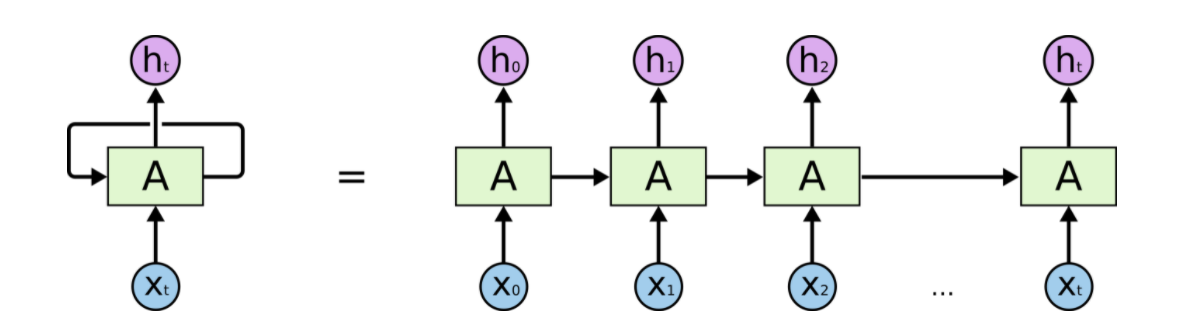

[17]

Bei LSTM Netzwerken gibt es vier verschiedene Zellen bzw. Gates.  
Forget Gate, Input Gate, Output Gate und den Cell State.  Im ersten Schritt wird die ankommende Information aus dem Input geprüft, ob diese behalten oder vergessen wird. Dies geschieht im Forget Gate. Je näher der Wert an der Null liegt, desto eher wird eher vergessen. Im weiteren Verlauf wird der Cell State, welcher als Gedächtnis des Netzwerks fungiert aktualisiert. Durch das Output Gate wird nun der neue Werte anhand der gemerkten Informationen berechnet und an den nächsten Hidden Layer gegeben [2,18].


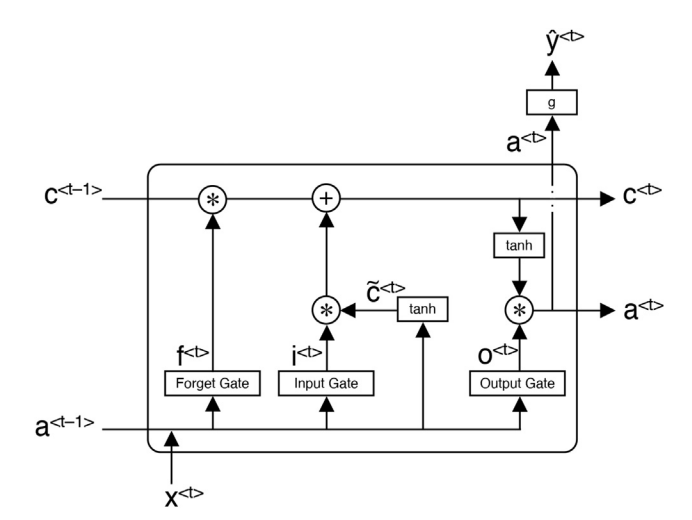

[2]

Leider können LSTM-Netzwerke zu starken Overfitting neige, z.B. bei der Auswahl mehrerer Layer. Hier kann aber die Drop-Out Rate auf einen entsprechend hohen Wert gesetzt werden.
Aus Literatur Recherchen ging hervor, dass das LSTM häufig besser als z.B. andere Algorithmen bzw. auch Formen der neuronalen Netz abschneidet. Deshalb haben wir uns auf das LSTM-Netzwerk fokussiert.
Das LSTM- Netzwerks wurde mit folgenden Parametern aufgebaut [2,3,18]:

| Parameter | Wert
| -------------- | -------------- 
| Optimizer | Adam
| Units | 10 
| Epochs |  100 
| Batch Size | 32
| Loss Function |  MAE
| Activation | ReLu 
| Drope Out | 0.2 


### 4.2.1 LSTM nur mit Close Price

#### Datenvorbereitung LSTM

In [ ]:
# Dropping all columns except date and close 
closedf = df[['Date', 'Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (2721, 2)


In [ ]:
# Creating a data frame with data from the last year 
closedf = closedf[closedf['Date'] > '2021-02-26']

# Create a copy of the data frame 
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  366


In [ ]:
del closedf['Date']
# Scaling the price between 0 and 1 
scaler=MinMaxScaler(feature_range=(0,1))
# Reshaping the array in 1d array without changing its data 
closedf=scaler.fit_transform(np.array(closedf)).reshape(-1,1)
print(closedf.shape)

(366, 1)


In [ ]:
# Splitting the data set in 70% train data and 30% in test data 
training_size=int(len(closedf)*0.70)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]

print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (256, 1)
test_data:  (110, 1)


In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 5
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (250, 5)
y_train:  (250,)
X_test:  (104, 5)
y_test (104,)


#### Modelling LSTM

In [ ]:
#Building LSTM
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="Adam")

In [ ]:
# Adding early stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
#Fit model and 
history = model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1,validation_data=(X_test,y_test),callbacks=[early_stop])
         
model.summary()

Epoch 1/100
8/8 [==============================] - 2s 50ms/step - loss: 0.2326 - val_loss: 0.1567
Epoch 2/100
8/8 [==============================] - 0s 10ms/step - loss: 0.2103 - val_loss: 0.1379
Epoch 3/100
8/8 [==============================] - 0s 10ms/step - loss: 0.1879 - val_loss: 0.1192
Epoch 4/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1650 - val_loss: 0.1006
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1420 - val_loss: 0.0820
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.1188 - val_loss: 0.0636
Epoch 7/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0957 - val_loss: 0.0450
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0718 - val_loss: 0.0276
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 0.0483 - val_loss: 0.0149
Epoch 10/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0302 - val_loss: 0.0099
Epoch 11/100
8/8 [======

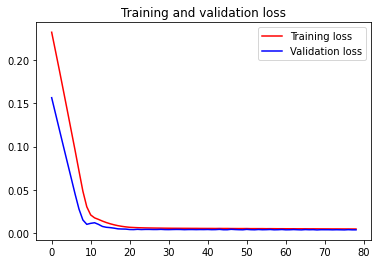

<Figure size 432x288 with 0 Axes>

In [ ]:
#Training and Validaton Loss Funktion/Epochs Check for Tensorboard

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
### Prediction and check performance metrics
train_predict_LSTM=model.predict(X_train)
test_predict_LSTM=model.predict(X_test)
train_predict_LSTM.shape, test_predict_LSTM.shape

((250, 1), (104, 1))

In [ ]:
# Transform back to original form

train_predict_LSTM = scaler.inverse_transform(train_predict_LSTM)
test_predict_LSTM = scaler.inverse_transform(test_predict_LSTM)
original_ytrain_LSTM = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest_LSTM = scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict_LSTM)+look_back, :] = train_predict_LSTM
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict_LSTM)+(look_back*2)+1:len(closedf)-1, :] = test_predict_LSTM
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Vergleich zwischen original Preis und hervorgesagtem Preis',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (366, 1)
Test predicted data:  (366, 1)


In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_LSTM,train_predict_LSTM)))
print("Train data MSE: ", mean_squared_error(original_ytrain_LSTM,train_predict_LSTM))
print("Train data MAE: ", mean_absolute_error(original_ytrain_LSTM,train_predict_LSTM))
print("Train data MAPE: ", mean_absolute_percentage_error(original_ytrain_LSTM, train_predict_LSTM))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_LSTM,test_predict_LSTM)))
print("Test data MSE: ", mean_squared_error(original_ytest_LSTM,test_predict_LSTM))
print("Test data MAE: ", mean_absolute_error(original_ytest_LSTM,test_predict_LSTM))
print("Test data MAPE: ", mean_absolute_percentage_error(original_ytest, test_predict_LSTM))

Train data RMSE:  2517.4091964835943
Train data MSE:  6337349.062540176
Train data MAE:  2002.8681328125
Train data MAPE:  0.043397106029058476
-------------------------------------------------------------------------------------
Test data RMSE:  2234.4938796512915
Test data MSE:  4992962.898199081
Test data MAE:  1719.2256234975962
Test data MAPE:  0.03813618958789795


In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain_LSTM, train_predict_LSTM))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest_LSTM, test_predict_LSTM))

Train data explained variance regression score: 0.9351045308541472
Test data explained variance regression score: 0.9066336009125101


Vorhersage 10 Tage LSTM

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3 4 5]
[ 6  7  8  9 10 11 12 13 14 15]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 5 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Vergleich der letzten 5 Tage mit den vorhergesagten nächsten 10 Tagen',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Verlauf des letzten Jahres inkl. Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### 4.2.2 LSTM mit Features und Target

#### Datenvorbereitung LSTM mit allen Features

In [ ]:
# Preparation of target and features
# Selecting data for one year
df_lstm_one_year = overall[overall['Date'] > '2021-02-26']

X = df_lstm_one_year.drop(columns=['Close', 'Date'], axis= 1)
y = df_lstm_one_year[["Close"]]


In [ ]:
# Scaling the price between 0 and 1 
scaler=MinMaxScaler(feature_range=(0,1))

# Reshaping the array in 1d array without changing its data 
X=scaler.fit_transform(np.array(X))
y=scaler.fit_transform(np.array(y))
print(X.shape)
print(y.shape)

(366, 4)
(366, 1)


https://medium.com/keita-starts-data-science/time-series-split-with-scikit-learn-74f5be38489e

In [ ]:
# Splitting the data set in 70% train data and 30% in test data 
X_train_lstm_f = X[:int(X.shape[0]*0.7)]
X_test_lstm_f = X[int(X.shape[0]*0.7):]
y_train_lstm_f = y[:int(X.shape[0]*0.7)]
y_test_lstm_f = y[int(X.shape[0]*0.7):]


print("X_train_data: ", X_train_lstm_f.shape)
print("X_test_data: ", X_test_lstm_f.shape)

print("y_train_data: ", y_train_lstm_f.shape)
print("y_test_data: ", y_test_lstm_f.shape)

X_train_data:  (256, 4)
X_test_data:  (110, 4)
y_train_data:  (256, 1)
y_test_data:  (110, 1)


#### LSTM mit allen Features

In [ ]:
#Building LSTM
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="Adam")

In [ ]:
# Adding early stopping
early_stop_f = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [ ]:
#Fit model and 
history = model.fit(X_train_lstm_f,y_train_lstm_f,epochs=100,batch_size=32,verbose=1,validation_data=(X_test_lstm_f,y_test_lstm_f),callbacks=[early_stop_f])
model.summary()

Epoch 1/100
8/8 [==============================] - 1s 42ms/step - loss: 0.2211 - val_loss: 0.1747
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1963 - val_loss: 0.1530
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 0.1712 - val_loss: 0.1317
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1478 - val_loss: 0.1109
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1239 - val_loss: 0.0911
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 0.1016 - val_loss: 0.0720
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0802 - val_loss: 0.0541
Epoch 8/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0610 - val_loss: 0.0376
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0429 - val_loss: 0.0242
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 0.0289 - val_loss: 0.0149
Epoch 11/100
8/8 [==========

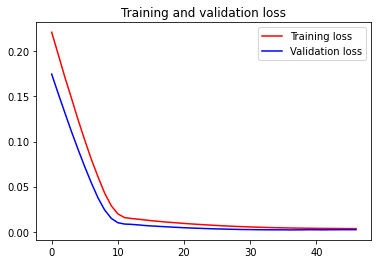

<Figure size 432x288 with 0 Axes>

In [ ]:
#Training and Validaton Loss Funktion/Epochs Check for Tensorboard

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# Prediction and check performance metrics
train_predict_LSTM_f=model.predict(X_train_lstm_f)
test_predict_LSTM_f=model.predict(X_test_lstm_f)
train_predict_LSTM_f.shape, test_predict_LSTM_f.shape

((256, 1), (110, 1))

In [ ]:
print("Train data explained variance regression score:", 
      explained_variance_score(y_train_lstm_f, train_predict_LSTM_f))
print("Test data explained variance regression score:", 
      explained_variance_score(y_test_lstm_f, test_predict_LSTM_f))

Train data explained variance regression score: 0.9498525092687206
Test data explained variance regression score: 0.955390118177286


In [ ]:
# Transform back to original form

train_predict_LSTM_f = scaler.inverse_transform(train_predict_LSTM_f)
test_predict_LSTM_f = scaler.inverse_transform(test_predict_LSTM_f)
original_ytrain_LSTM_f = scaler.inverse_transform(y_train_lstm_f)
original_ytest_LSTM_f = scaler.inverse_transform(y_test_lstm_f)

In [ ]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain_LSTM_f,train_predict_LSTM_f)))
print("Train data MSE: ", mean_squared_error(original_ytrain_LSTM_f,train_predict_LSTM_f))
print("Train data MAE: ", mean_absolute_error(original_ytrain_LSTM_f,train_predict_LSTM_f))
print("Train data MAPE: ", mean_absolute_percentage_error(original_ytrain_LSTM_f, train_predict_LSTM_f))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest_LSTM_f,test_predict_LSTM_f)))
print("Test data MSE: ", mean_squared_error(original_ytest_LSTM_f,test_predict_LSTM_f))
print("Test data MAE: ", mean_absolute_error(original_ytest_LSTM_f,test_predict_LSTM_f))
print("Test data MAPE: ", mean_absolute_percentage_error(original_ytest_LSTM_f, test_predict_LSTM_f))

Train data RMSE:  2219.766497880963
Train data MSE:  4927363.305114716
Train data MAE:  1795.8307189941406
Train data MAPE:  0.04070429431743184
-------------------------------------------------------------------------------------
Test data RMSE:  1819.015652445223
Test data MSE:  3308817.94384072
Test data MAE:  1499.4465909090911
Test data MAPE:  0.031715749509650754


Vorhersage 10 Tage LSTM

In [ ]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()


lst_output=[]
n_steps=time_step
i=0
pred_days = 10
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  10


In [ ]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[1 2 3 4 5]
[ 6  7  8  9 10 11 12 13 14 15]


In [ ]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 5 days close price','Predicted next 10 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Vergleich der letzten 5 Tage mit den vorhergesagten nächsten 10 Tagen',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Verlauf des letzten Jahres inkl. Prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

# 5 - Evaluation
- Tabelle 
- Visualisierung/Diagramm (LSTM, XGBoost)
- Vergleich mit Kaggel Dudes!

Die beiden Modelle werden anhand folgender statistischen Werte bewertet:

Mean Absolute Error (MAE):
Der mittlerer absolute Fehler bezieht sich auf den Mittelwert der absoluten Fehlerwerte, welche für jeden Punkt im Datensatz gemessen wurden.
Ein perfektes Modell erzeugt einen Wert von Null. Je näher die Werte beim Wert Null liegen, desto besser. Da die allgemein die Werte der Kryptowährung über Werten von größer 10.000 liegen, liegt auch der MAE teilweise bei einer vierstelligen Zahl.
Nachteil: Alle Strafen werden gleich gewichtet: D.h. bei einem längeren Zeitraum mit kleinen Werten wird das Endergebnis stark verzerrt [19].

Mean Squared Error (MSE):
Der mittlere quadratische Fehler bezieht sich auf den Mittelwert der quadratischen Fehlerwerte. Hier wird sichergestellt, dass die Werte über Null liegen. Die Auswirkung von größeren beobachteten Fehlern wirkt sich durch die Quadrierung stärker auf das Ergebnis aus als kleine beobachtete Fehler. Wird häufig für die Optimierung von maschinellen Lernverfahren angewendet, da hier die besonders die Minimierung der Fehler angestrebt wird [19].

Root Mean Square Error (RMSE):
Der RMSE wird berechnet, indem die Quadratwurzel des MSE gezogen wird. Diese Metrik wird oft bei Modellen mit vielen Ausreißern verwendet. Auch hier gilt, je kleiner der Wert, desto besser ist das Model trainiert [19].

Explained Variance Score (VRS):
Dieser Werte beschreibt die Proportionalität der Varianz des Datesets, also die quadrierte Standardabweichung der jeweiligen Datenpunkte in Prozent.
Der höchste zu erreichende Wert liegt bei 1.0 [19].

Mean Absolute Percentage Error (MAPE):
MAPE  beschreibt den absoluten mittleren Fehler in Prozent. Dabei ist dieser besonders gegenüber relativen Fehlern sensibel. Dieser kann nicht bei Nullwerten verwendet werden, da eine Division durch Null zu Fehlern führt. Ebenfalls fallen die Auswirkungen bei negativen Fehlern stärker ins Gewicht als bei positiven. Dies kann das Ergebnis wiederum verzerren [19]. 


VRS (Variance Regression Score): Bestmögliches Ergebnis 1.0\
RSME (Root Squared Mean Error): Bestmögliches Ergebnis 0.0\
MSE (Mean Squared Error): Bestmögliches Ergebnis 0.0\
MAE (Mean Absolute Error): Bestmögliches Ergebnis 0.0\
MAPE (Mean Absolute Percentage Error): Bestmögliches Ergebnis 0.0



### Ergebnisse xGBoost

| Time Step | MAPE | MAE | VRS
| -------------- | -------------- | ------------ | ------------
| 1 | 2,90% | 1.338,20 | 94,50%
| 3 | 3,03% | 1.369,44 | 93,71%
| 5 | 3,03% | 1.379,59 | 93,22%
| 10 | 3,10% | 1.356,11 | 91,29%
| 20 | 3,40% | 1.478,98 | 84,49%

### Ergebnisse xGBoost mit Parametertuning

| Time Step | MAPE | MAE | VRS
| -------------- | -------------- | ------------ | ------------
| 1 | 2,83% | 1.307,22 | 94,84%
| 3 | 3,14% | 1.430,79 | 93,11%
| 5 | 3,13% | 1.745,41 | 92,51%
| 10 | 3,11% | 1.392,09 | 91,16%
| 20 | 3,56% | 1.541,21 | 84,00%


### Ergebnisse LSTM

| Time Step | MAPE | MAE | VRS
| -------------- | -------------- | ------------ | ------------
| 1 | 3,81% | 1777,45 | 89,08%
| 3 | 3,68% | 1675,46 | 90,73%
| 5 | 3,95% | 1785,60 | 89,53%
| 10 | 3,87% | 1717,44 | 90,21%
| 20 | 3,53% | 1587,12 | 91,89%

### Ergebnisse LSTM mit allen Features

| Time Step | MAPE | MAE | VRS
| -------------- | -------------- | ------------ | ------------
| 1 | 2,31% | 1072,02 | 97,34%
| 3 | 2,31% | 1072,02 | 95,89%
| 5 | 3,65% | 1733,37 | 94,53%
| 10 | 2,99% | 1425,22 | 95,30%
| 20 | 3,49% | 1653,67 | 94,30%


### Interpretation der Ergebnisse

Generell ist bei der Optimierung des LST kein merklicher Unterschied bei verschiedenen "Loss Funktionen" aufgetreten.  Bei der Aktivierungsfunktion hingegen hat in diesem Beispiel die ReLu-Funktion am besten abgeschnitten. Es wurde eine Batch Size von 32 und Epochengröße von 100 gewählt. Mit größeren Batch Sizes wurde vor allem ein signifikanter Ressourcenverbrauchs allerdings keine merkliche Verbesserung festgestellt. Diese Beobachtung trat auch bei einer höheren Anzahl an Layern ein.

Beim LSTM-Netzwerk wurde zum einen der Algorithmus mit lediglich dem Close Wert gefüttert und zum anderen mit allen Features. Generell ist zu beachten, dass es bei neuronalen Netzen bei mehreren Durchläufen zu leicht abweichenden Werten kommen kann.

Für die Modellierung mit lediglich den Close-Werten ist zu erkennen, dass mit steigender Größe an Time Steps sich sowohl der MAPE-Wert als auch der VRS tendenziell leicht verbessern. Der mittlere Fehlerwert hingegen schwankt.

Bei der Modellierung mit allen Features hingegen ist diese Beobachtung genau gegenläufig. Mit steigender Größe an Time-Steps wird der der sowohl der MAPE-Wert und MAE-Wert als auch der VRS-Wert schlechter. Dabei erreicht die Modellierung mit allen Features wesentlich höhere Werte. Hier wird ein VRS von 97,34% und ein MAPE von 2,31% erreicht, wohingegen bei der Modellierung mit dem Close-Preis nur ein VRS von 91,89% und ein MAPE von 3,53% erreicht wird. Allerdings scheint die Feature-Modellierung bei kleinen Time-Steps stark an Over-Fitting zu leiden. 

Im Vergleich der beiden Modelle, lässt sich beobachten, dass das Parameter-Tuning kaum merkliche Verbesserungen erzielt hat. XG-Boost schneidet für kleine Time-Steps sehr gut ab. Es werden Werte 94,98% VRS und 2,83% MAPE nach dem Parameter-Tuning erreicht. Allerdings leicht schlechter als die Modellierung mit LSTM und allen Features. 

Auch beim xG-Boost gibt es Schwankungen bei den MAE-Werten. Hier kann keine stringente abnehmende bzw. zunehmende Tendenz erkannt werden.

Zusammenfassend lässt sich bestätigen, dass die Modellierung mit LSTM bei längeren Zeiträumen besserer Werte erzielt, als dass xG-Boost verfahren. Dennoch schneidet das bei xG-Boost Verfahren bei kleinen Betrachtungszeiträumen sehr gut ab.

Die anfänglichen gesetzten Zielprämissen wurden erreicht. Dennoch ist eine genaue kurzfristige Vorhersage der Kurse anhand der Preis Parameter sehr schwierig, da viele andere Faktoren hohen Einfluss auf die Preisschwankungen haben können. So sollte z.B. auch die gesamtwirtschaftliche Lage, sowie Investitionen von in der Öffentlichkeit stehenden Personen berücksichtigt werden. Die Verknüpfung mit einer „Sentimental Analyse“ also die Anbindung an z.B. social Media kann dabei neue Erkenntnisse liefern.


# 6 - Ausblick

### Erweiterungsmöglichkeiten des Models
- Sentimental analysis, z.B. Einfluss von Social Media auf den Kurs 
- Portfoliomanagement mit mehreren Kryptowährungen
- Weiterentwicklung Transformer 
- Kürzere Zeiträume als Möglichkeit? 

Des Weiteren könnten mithilfe eines Bots automatisiert Transaktionen auf Grundlage der vorhergesagten Preise durchgeführt werden und dem Nutzer so den manuellen Aufwand Transaktionen zu tätigen komplett abnehmen. Im Umfeld von Kryptowährungen sind eine Vielzahl solcher Bots käuflich zu erwerben, auch wenn die Seriosität dieser teilweise fragwürdig erscheint. Eine Untersuchung kam zu dem Ergebnis, dass Bots für bis zu 86% des gesamten Handelsvolumens im Kryptoumfeld verantwortlich sind [20]. Für die Programmierung eines eigenen Bots könnte auf bestehende Ausarbeitungen zurückgegriffen werden [21, 22].

# Quellen:

[1] Cerounosoftware: https://cerounosoftware.com.mx/2018/01/15/criptomonedas-por-qu%C3%A9-est%C3%A1n-tomando-importancia/, abgerufen am 25.02.2022

[2]  

P. Jaquart, D. Dann und C. Weinhardt, „Short-term bitcoin market prediction via machine learning,“ The Journal of Finance and Data Science, pp. 45-66, November 2021.  

[3]  

M. Mudassir, S. Bennbaia und D. Unal, „Time-series forecasting of Bitcoin prices using high-dimensional features: a machine learning approach,“ Neural Comput & Applic, Juli 2020.  

[4]  

S. Mohapatra, N. Ahmed und P. Alencar, „KryptoOracle: A Real-Time Cryptocurrency Price Prediction Platform Using Twitter Sentiments,“ in 2019 IEEE International Conference on Big Data, Los Angeles, 2019.  

[5]  

I. G. A. Pernice und B. Scott, „Cryptocurrency,“ Internet Policy Review, 20 Mai 2021.  

[6]  

„Coinmarketcap,“ [Online]. Available: https://coinmarketcap.com/. [Zugriff am 25 Februar 2022]. 


[7]

Yahoo Finance: https://de.finance.yahoo.com, abgerufen am: 25.02.2022<br>

[8]

Yfinance Modul/API: https://pypi.org/project/yfinance/, abgerufen am: 25.02.
2022<br>

[9]

Kaggle Notebook LSTM: https://www.kaggle.com/meetnagadia/bitcoin-price-prediction-using-lstm, abgerufen am: 25.02.2022<br>

[10]

Kaggle Notebook XGBoost: https://www.kaggle.com/ysthehurricane/bitcoin-dogecoin-etc-price-prediction-xgboost, abgerufen am: 25.02.2022<br>

[11]

Analyzing Alpha: https://analyzingalpha.com/open-high-low-close-stocks, abgerufen am: 25.02

[12]

Nguyen, C./ Zeigermann, O.: Machine Leraning – kurz & gut, Heidelberg: O'Reillys, 2021, S. 25-43<br>

[13] 

Nokeri, T.: Data Science Solutions with Python. Fast and Scalable Models Using Keras, PySpark MLlib, H2O, XGBoost, and Scikit-Learn. S. 14, Südafrika, 2022 

[14] 

Chen, T. / Guestrin, C., XGBoost: A Scalable Tree Boosting System.URL: http://doi.acm.org/10.1145/2939672.2939785/, abgerufen am 24.02.2022

[15] 

Saha, S., XGBoost vs LightGBM: How Are They Different, https://neptune.ai/blog/xgboost-vs-lightgbm/, Februar 2022, abgerufen am 24.02.2022

[16] 

Martins, D., XGBoost: A Complete Guide to Fine-Tune and Optimize your Model, https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663/, Mai 2021, abgerufen am 24.02.2022


[17]

http://colah.github.io/posts/2015-08-Understanding-LSTMs/,
abgerufen am: 26.02.2022<br>

[18]

Awoke T., et al. Bitcoin Price Prediction and Analysis Using Deep Learning Models, KIIT University, October 2020

[19]

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics\,
abgerufen am: 26.02.2022<br>



[20]  

A. Cochran, „cochran.io,“ 2019. [Online]. Available: https://github.com/AdamSC1-ddg/AdamCochran/raw/master/MarketAnalysisOfAutomatedTradingInCrypto%20-%20Cochran%20Research.pdf. [Zugriff am 27 Februar 2022]. 

[21]  

M. Mathur, S. Mhadalekar, S. Mhatre und V. Mane, „Algorithmic Trading Bot,“ in International Conference on Automation, Computing and Communication 2021, Navi Mumbai, 2021.  

[22]  

A. R. Azhikodan, A. G. K. Bhat und M. V. Jadhav, „Stock Trading Bot Using Deep Reinforcement Learning,“ Innovations in Computer Science and Engineering , pp. 41-49, Mai 2019.  